# Importar ibrerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
#from ipywidgets import FileUpload

# Cargar el archivo

In [2]:
# Cargar el archivo directamente desde el directorio donde está el notebook
nombre_archivo = 'Turnos septiembre 2024.xlsx'  # Puedes cambiar este nombre por el archivo que quieras cargar
data = pd.read_excel(nombre_archivo)

# Validar los datos
data.head()

,Zona,Sede,Turno,Taquilla,Funcionario,Grupo,Tiempo de espera (hh:mm:ss),Tiempo de atención (hh:mm:ss),Fecha de impresión,Fecha de llamado,...,Fin Servicio,Tiempo Servicio,Numero de Asignación,Abandonado,Nombre del Cliente,Identificacion del Cliente,IdTurno,IdServicio,IdSede,IdTurnoServicio
0,Regional Cúcuta,SEVILLA,G1,11,LEYDI CAROLINA CARRASCAL EPALZ,Atención General,00:00:03,00:39:07,2024-09-02 06:04:47,2024-09-02 06:04:50,...,06:23:07,00:18:17,NaN,NO,JORGE ELIECER CAICEDO CONTRERAS,13462195,2406183,24,2,2484759
1,Regional Cúcuta,SEVILLA,G1,11,LEYDI CAROLINA CARRASCAL EPALZ,Atención General,00:00:00,00:39:07,2024-09-02 06:04:47,2024-09-02 06:04:50,...,06:37:07,00:14:00,NaN,NO,JORGE ELIECER CAICEDO CONTRERAS,13462195,2406183,23,2,2484761
2,Regional Cúcuta,SEVILLA,G1,11,LEYDI CAROLINA CARRASCAL EPALZ,Atención General,00:00:00,00:39:07,2024-09-02 06:04:47,2024-09-02 06:04:50,...,06:43:57,00:06:50,NaN,NO,JORGE ELIECER CAICEDO CONTRERAS,13462195,2406183,23,2,2484764
3,Regional Cúcuta,SEVILLA,F1,6,OMAYRA SANTAFE MENDOZA,Financiación,00:00:36,00:21:00,2024-09-02 06:05:44,2024-09-02 06:06:20,...,06:27:20,00:21:00,NaN,NO,ANA MALLERLY URBINA ZAPATA,37391127,2406184,28,2,2484755
4,Regional Cúcuta,SEVILLA,G2,5,YORLY KARINA MARTINEZ LOPEZ,Atención General,00:04:56,00:15:37,2024-09-02 06:05:59,2024-09-02 06:10:55,...,06:26:32,00:15:37,NaN,NO,YANNETH MIRANDA LANDINEZ,60337306,2406185,23,2,2484749


In [37]:
'''Para usarlo en google_Colab de Google'''
# from google.colab import drive
# drive.mount('/content/drive')
# ruta = "/content/drive/MyDrive/OFOSI/PROPUESTA_EFICIENCIA/julio_2024.xlsx"# Puedes cambiar esto por el nombre del archivo cargado
# data = pd.read_excel(ruta)
# data.head()

'Para usarlo en google_Colab de Google'

# Validar los datos

## ETL de los datos

In [31]:
data.shape #Conocer las dimensiones de la data, FilasxColumnsa

(33302, 24)

In [32]:
data = data.rename(columns={'Tiempo de espera (hh:mm:ss)' : 'Tiempo de espera',
                            'Tiempo de atención (hh:mm:ss)' : 'Tiempo de atencion'})
print(data.columns)
print(f'La cantidad de datos inicial es de {len(data)}')

Index(['Zona', 'Sede', 'Turno', 'Taquilla', 'Funcionario', 'Grupo',
       'Tiempo de espera', 'Tiempo de atencion', 'Fecha de impresión',
       'Fecha de llamado', 'Fecha de atención', 'Hora de Impresion',
       'Servicio', 'Inicio Servicio', 'Fin Servicio', 'Tiempo Servicio',
       'Numero de Asignación', 'Abandonado', 'Nombre del Cliente',
       'Identificacion del Cliente', 'IdTurno', 'IdServicio', 'IdSede',
       'IdTurnoServicio'],
      dtype='object')
La cantidad de datos inicial es de 33302


In [33]:
#Se convierte en Df y se eliminan los turnos de Pruebas, y del grupo Veolia que no corresponden
data_cens_df = pd.DataFrame(data)
data_cens_df = data_cens_df[data_cens_df['Sede'] != 'PRUEBAS']
data_cens_df = data_cens_df[~(data_cens_df['Grupo'] == 'Veolia')]
data_cens_df = data_cens_df[~(data_cens_df['Grupo'] == 'Veolia Priorotario')]
data_cens_df = data_cens_df[~(data_cens_df['Grupo'] == 'Gases')]
data_cens_df = data_cens_df[~(data_cens_df['Grupo'] == 'Aseo Urbano')]
data_cens_df = data_cens_df[~(data_cens_df['Grupo'] == 'Pruebas')]

In [34]:
#Validar valores nulos
valores_nulos = pd.DataFrame(data_cens_df
                 .isnull()
                 .sum())
valores_nulos

,0
Zona,0
Sede,0
Turno,0
Taquilla,0
Funcionario,0
Grupo,0
Tiempo de espera,0
Tiempo de atencion,0
Fecha de impresión,0
Fecha de llamado,0


In [35]:
#Se eliminan las columnas con nulos significataivos, y eliminan servicios
data_cens_df = data_cens_df.drop(['Numero de Asignación'], axis=1) #Eliminar la columna vacia con NAN
data_cens_df = data_cens_df.drop_duplicates(subset=['IdTurno']) #Eliminar servicios, dejando solo turnos unicos
data_cens_df.shape #Mostrar las nuevas filas x columnas

(28820, 23)

In [36]:
columnas_con_nulos = ['Zona', 'Sede', 'Turno', 'Taquilla', 'Funcionario', 'Grupo',
                      'Tiempo de espera', 'Tiempo de atencion', 'Fecha de impresión',
                      'Fecha de llamado', 'Fecha de atención', 'Hora de Impresion',
                      'Abandonado', 'Nombre del Cliente', 'Identificacion del Cliente',
                      'IdTurno', 'IdServicio', 'IdSede', 'IdTurnoServicio']

# Eliminar las filas que tienen valores nulos en las columnas especificadas
data_cens_df = data_cens_df.dropna(subset=columnas_con_nulos)

In [37]:
valores_nulos = pd.DataFrame(data_cens_df.isnull().sum())
print(valores_nulos)

                              0
Zona                          0
Sede                          0
Turno                         0
Taquilla                      0
Funcionario                   0
Grupo                         0
Tiempo de espera              0
Tiempo de atencion            0
Fecha de impresión            0
Fecha de llamado              0
Fecha de atención             0
Hora de Impresion             0
Servicio                    909
Inicio Servicio             909
Fin Servicio                909
Tiempo Servicio             909
Abandonado                    0
Nombre del Cliente            0
Identificacion del Cliente    0
IdTurno                       0
IdServicio                    0
IdSede                        0
IdTurnoServicio               0


## Cantidad de turnos generados en el mes evaluado

In [38]:
cantidad_turnos_generados = len(data_cens_df)
print(f'La cantidad de turnos inicial es de {cantidad_turnos_generados}')

La cantidad de turnos inicial es de 28820


## Transformar las columnas de tiempo a minutos

In [39]:
# Convertir hh:mm:ss a minutos para la columna 'Tiempo de espera'
data_cens_df['Tiempo de espera'] = data_cens_df['Tiempo de espera'].astype(str).apply(
    lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) + int(x.split(':')[2]) / 60
)
data_cens_df.head()

,Zona,Sede,Turno,Taquilla,Funcionario,Grupo,Tiempo de espera,Tiempo de atencion,Fecha de impresión,Fecha de llamado,...,Inicio Servicio,Fin Servicio,Tiempo Servicio,Abandonado,Nombre del Cliente,Identificacion del Cliente,IdTurno,IdServicio,IdSede,IdTurnoServicio
0,Regional Cúcuta,SEVILLA,G1,11,LEYDI CAROLINA CARRASCAL EPALZ,Atención General,0.050000,00:39:07,2024-09-02 06:04:47,2024-09-02 06:04:50,...,06:04:50,06:23:07,00:18:17,NO,JORGE ELIECER CAICEDO CONTRERAS,13462195,2406183,24,2,2484759
3,Regional Cúcuta,SEVILLA,F1,6,OMAYRA SANTAFE MENDOZA,Financiación,0.600000,00:21:00,2024-09-02 06:05:44,2024-09-02 06:06:20,...,06:06:20,06:27:20,00:21:00,NO,ANA MALLERLY URBINA ZAPATA,37391127,2406184,28,2,2484755
4,Regional Cúcuta,SEVILLA,G2,5,YORLY KARINA MARTINEZ LOPEZ,Atención General,4.933333,00:15:37,2024-09-02 06:05:59,2024-09-02 06:10:55,...,06:10:55,06:26:32,00:15:37,NO,YANNETH MIRANDA LANDINEZ,60337306,2406185,23,2,2484749
5,Regional Cúcuta,TRANSACIONES RAPIDAS,1,TR SEVILLA,THALIA CORAYMA PEREZ DAVILA,Transacciones rápidas,0.000000,00:00:01,2024-09-02 06:06:36,2024-09-02 06:06:36,...,06:06:36,06:06:37,00:00:01,NO,GENERICO,SIN CEDULA,2406186,559,51,2484747
6,Regional Cúcuta,TRANSACIONES RAPIDAS,2,TR SEVILLA,THALIA CORAYMA PEREZ DAVILA,Transacciones rápidas,0.000000,00:03:07,2024-09-02 06:08:20,2024-09-02 06:08:20,...,06:08:20,06:11:27,00:03:07,NO,GENERICO,SIN CEDULA,2406187,560,51,2484748


In [40]:
#Convertir la columna fecha impresión a formato fecha y hora
columnas_a_transformar = ['Fecha de impresión', 'Fecha de llamado', 'Fecha de atención']

data_cens_df[columnas_a_transformar] = data_cens_df[columnas_a_transformar].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S', errors='coerce'))

# Mapeo de días de la semana de inglés a español
dias_español = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

#Extraer semana, mes, año, mes-año, dia del mes
data_cens_df['Año'] = data_cens_df['Fecha de impresión'].dt.year
data_cens_df['Mes'] = data_cens_df['Fecha de impresión'].dt.month
data_cens_df['Año-Mes'] = data_cens_df['Fecha de impresión'].dt.strftime('%Y-%m')
data_cens_df['Año-Mes-Dia'] = data_cens_df['Fecha de impresión'].dt.strftime('%Y-%m-%d')
data_cens_df['Semana del Año'] = data_cens_df['Fecha de impresión'].dt.isocalendar().week
data_cens_df['Dia_Del_mes'] = data_cens_df['Fecha de impresión'].dt.day

#Extraer día de la semana y hora
data_cens_df['Dia de la semana'] = data_cens_df['Fecha de impresión'].dt.day_name().map(dias_español)
data_cens_df['Hora'] = data_cens_df['Fecha de impresión'].dt.hour

data_cens_df.head()

,Zona,Sede,Turno,Taquilla,Funcionario,Grupo,Tiempo de espera,Tiempo de atencion,Fecha de impresión,Fecha de llamado,...,IdSede,IdTurnoServicio,Año,Mes,Año-Mes,Año-Mes-Dia,Semana del Año,Dia_Del_mes,Dia de la semana,Hora
0,Regional Cúcuta,SEVILLA,G1,11,LEYDI CAROLINA CARRASCAL EPALZ,Atención General,0.050000,00:39:07,2024-09-02 06:04:47,2024-09-02 06:04:50,...,2,2484759,2024,9,2024-09,2024-09-02,36,2,Lunes,6
3,Regional Cúcuta,SEVILLA,F1,6,OMAYRA SANTAFE MENDOZA,Financiación,0.600000,00:21:00,2024-09-02 06:05:44,2024-09-02 06:06:20,...,2,2484755,2024,9,2024-09,2024-09-02,36,2,Lunes,6
4,Regional Cúcuta,SEVILLA,G2,5,YORLY KARINA MARTINEZ LOPEZ,Atención General,4.933333,00:15:37,2024-09-02 06:05:59,2024-09-02 06:10:55,...,2,2484749,2024,9,2024-09,2024-09-02,36,2,Lunes,6
5,Regional Cúcuta,TRANSACIONES RAPIDAS,1,TR SEVILLA,THALIA CORAYMA PEREZ DAVILA,Transacciones rápidas,0.000000,00:00:01,2024-09-02 06:06:36,2024-09-02 06:06:36,...,51,2484747,2024,9,2024-09,2024-09-02,36,2,Lunes,6
6,Regional Cúcuta,TRANSACIONES RAPIDAS,2,TR SEVILLA,THALIA CORAYMA PEREZ DAVILA,Transacciones rápidas,0.000000,00:03:07,2024-09-02 06:08:20,2024-09-02 06:08:20,...,51,2484748,2024,9,2024-09,2024-09-02,36,2,Lunes,6


In [41]:
data_cens_df.shape

(28820, 31)

## Cantidad de turnos por grupo

In [43]:
data_cens_df['Grupo'].value_counts()

Atención General                    21550
Transacciones rápidas                1672
Asesor Virtual_Todos LosTrámites     1634
Atención Prioritaria                 1386
Financiación                          979
Asesor Virtual_Constructor            755
Vinculaciones                         284
Constructoras                         227
Notificaciones                        115
Ofertas                               101
Abonos                                 95
Atenciones Generales APP               10
Atencion General Gramalote              6
Constructoras APP                       5
Vinculaciones APP                       1
Name: Grupo, dtype: int64

# Conteo de turnos por delante

In [44]:
def calcular_turnos_esperando(df):
    # Convertir las columnas de fechas a formato datetime
    df['Fecha de impresión'] = pd.to_datetime(df['Fecha de impresión'])
    df['Fecha de llamado'] = pd.to_datetime(df['Fecha de llamado'])

    # Ordenar el DataFrame por Sede y Fecha de impresión
    df = df.sort_values(by=['Sede', 'Fecha de impresión'])

    # Lista para almacenar el número de turnos esperando
    turnos_esperando = []

    # Iterar sobre cada fila del DataFrame
    for i, row in df.iterrows():
        # Filtrar el DataFrame para encontrar los turnos que estaban esperando antes del turno actual
        esperando = df[(df['Sede'] == row['Sede']) &  # Misma sede
                       (df['Fecha de impresión'] < row['Fecha de impresión']) &  # Turnos generados antes del actual
                       (df['Fecha de llamado'] > row['Fecha de impresión'])].shape[0]  # Turnos que todavía no han sido llamados

        # Añadir el número de turnos esperando a la lista
        turnos_esperando.append(esperando)

        '''Se puede eliminar el # para que al ejecutarse se vaya mostrando como se itera'''
        # print(f"Sede: {row['Sede']}, Fecha de impresión: {row['Fecha de impresión']}, Fecha de llamado: {row['Fecha de llamado']}, Esperando: {esperando}")

    # Añadir la nueva columna 'Turnos_Esperando' al DataFrame original
    df['Turnos_Esperando'] = turnos_esperando

    return df

# Calcular turnos esperando para el DataFrame completo
data_procesada = calcular_turnos_esperando(data_cens_df)

# Guardar el DataFrame procesado si es necesario
# data_turnos_unicos_procesado.to_pickle('/content/drive/MyDrive/OFOSI/PROPUESTA_EFICIENCIA/Analisis/data_turnos_unicos_procesado.pkl')

print("Procesamiento completo.")

Procesamiento completo.


# Clasificación por grupos

## Grupos x Sedes

In [45]:
#Propuesta 1
grupo_1_p1 = ['R. AGUACHICA', 'CAC ATALAYA', 'R. OCAÑA']

grupo_2_p1 = ['CENTRO', 'LOC. EL ZULIA', 'R. PAMPLONA', 'CAC LOS PATIOS', 'CAC LA LIBERTAD', 'CAC VILLA DEL ROSARIO', 'R. TIBÚ']

localidades = ['LOC. ABREGO', 'LOC. ARBOLEDAS',
       'LOC. BOCHALEMA', 'LOC. BUCARASICA', 'LOC. CACHIRA', 'LOC. CACOTA',
       'LOC. CAMPO DOS', 'LOC. CHINACOTA', 'LOC. CHITAGA',
       'LOC. CONVENCIÓN', 'LOC. CUCUTILLA', 'LOC. DURANIA',
       'LOC. EL CARMEN', 'LOC. EL TARRA', 'LOC. GAMARRA',
       'LOC. GONZALEZ', 'LOC. HACARÍ', 'LOC. HERRAN', 'LOC. LA GABARRA',
       'LOC. LA PLAYA', 'LOC. LABATECA', 'LOC. LOURDES', 'LOC. MORALES',
       'LOC. MUTISCUA', 'LOC. PAMPLONITA', 'LOC. PELAYA',
       'LOC. PTO SANTANDER', 'LOC. RAGONVALIA', 'LOC. RIO DE ORO',
       'LOC. SALAZAR', 'LOC. SAN CALIXTO', 'LOC. SAN CAYETANO',
       'LOC. SANTIAGO', 'LOC. SARDINATA', 'LOC. SILOS', 'LOC. TEORAMA',
       'LOC. TOLEDO', 'LOC. VILLA CARO', 'MOVIL 1 (335)', 'MOVIL 2 (338)', 'TIBU MOVIL']

grupo_1_p2 = ['R. AGUACHICA', 'CAC ATALAYA', 'R. OCAÑA','CENTRO', 'LOC. EL ZULIA', 'R. PAMPLONA', 'CAC LOS PATIOS', 'CAC LA LIBERTAD', 'CAC VILLA DEL ROSARIO', 'R. TIBÚ']


In [46]:
data_procesada['Tipo'] = data_procesada['Grupo'].apply(lambda x : 'Prioritario' if x == 'Atención Prioritaria' else 'No prioritario')
data_procesada['Tipo'].value_counts()

No prioritario    27434
Prioritario        1386
Name: Tipo, dtype: int64

### Propuesta 1

In [49]:
#Clasificación de grupos
#Columna clasificación P1
def clasificar_grupo(row):
    if row['Sede'] == 'SEVILLA':
        if row['Tipo'] == 'Prioritario':
            return 'Sevilla_P'
        else:
            return 'Sevilla_NP'
    elif row['Grupo'] == 'Transacciones rápidas':
        return 'Transacciones_Rapidas'
    elif row['Sede'] in grupo_1_p1:
        if row['Tipo'] == 'Prioritario':
            return 'grupo_1_P'
        else:
            return 'grupo_1_NP'
    elif row['Sede'] in grupo_2_p1:
        if row['Tipo'] == 'Prioritario':
            return 'grupo_2_P'
        else:
            return 'grupo_2_NP'
    elif row['Sede'] in localidades:
        return 'localidades'
    elif row['Grupo'] == 'Atencion General Gramalote':
        return 'Gramalote'
    elif row['Sede'] == 'SEDE_VIRTUAL':
        if row['Grupo'] == 'Asesor Virtual_Constructor':
            return 'Virtual_Constructor'
        elif row['Grupo'] == 'Asesor Virtual_Todos LosTrámites':
            return 'Virtual_Tramites'
    else:
        return 'localidades'

# Aplicar la función de clasificación al DataFrame
data_procesada['Clasificacion_P1'] = data_procesada.apply(clasificar_grupo, axis=1)
data_procesada['Clasificacion_P1'].value_counts()

grupo_2_NP               8154
grupo_1_NP               5813
localidades              5772
Sevilla_NP               3715
Transacciones_Rapidas    1672
Virtual_Tramites         1634
Virtual_Constructor       755
grupo_1_P                 542
grupo_2_P                 523
Sevilla_P                 234
Gramalote                   6
Name: Clasificacion_P1, dtype: int64

### Propuesta 2

In [50]:
#Clasificación de grupos
#Columna clasificación P2
def clasificar_grupo(row):
    if row['Sede'] == 'SEVILLA':
        if row['Tipo'] == 'Prioritario':
            return 'Sevilla_P'
        else:
            return 'Sevilla_NP'
    elif row['Grupo'] == 'Transacciones rápidas':
        return 'Transacciones_Rapidas'
    elif row['Sede'] in grupo_1_p2:
        if row['Tipo'] == 'Prioritario':
            return 'grupo_1_P'
        else:
            return 'grupo_1_NP'
    elif row['Sede'] in localidades:
        return 'localidades'
    elif row['Grupo'] == 'Atencion General Gramalote':
        return 'Gramalote'
    elif row['Sede'] == 'SEDE_VIRTUAL':
        if row['Grupo'] == 'Asesor Virtual_Constructor':
            return 'Virtual_Constructor'
        elif row['Grupo'] == 'Asesor Virtual_Todos LosTrámites':
            return 'Virtual_Tramites'
    else:
        return 'localidades'

# Aplicar la función de clasificación al DataFrame
data_procesada['Clasificacion_P2'] = data_procesada.apply(clasificar_grupo, axis=1)
data_procesada['Clasificacion_P2'].value_counts()

grupo_1_NP               13967
localidades               5772
Sevilla_NP                3715
Transacciones_Rapidas     1672
Virtual_Tramites          1634
grupo_1_P                 1065
Virtual_Constructor        755
Sevilla_P                  234
Gramalote                    6
Name: Clasificacion_P2, dtype: int64

## Grupos x Arribos

In [51]:
grupo_1_arribos = ['SEVILLA']
grupo_2_arribos = ['R. AGUACHICA', 'SEDE_VIRTUAL', 'R. OCAÑA']
grupo_3_arribos = ['CENTRO', 'CAC ATALAYA', 'R. PAMPLONA', 'CAC LOS PATIOS', 'CAC LA LIBERTAD', 'CAC VILLA DEL ROSARIO', 'R. TIBÚ']
grupo_4_arribos = ['LOC. EL ZULIA', 'LOC. CHINACOTA', 'LOC. GAMARRA', 'LOC. EL TARRA', 'LOC. ABREGO', 'LOC. MORALES', 'LOC. PTO SANTANDER', 'LOC. PELAYA', 'LOC. CONVENCIÓN', 'MOVIL 2 (338)', 'MOVIL 1 (335)', 'LOC. CACHIRA', 'LOC. EL CARMEN', 'LOC. TOLEDO', 'LOC. SARDINATA', 'LOC. RAGONVALIA', 'LOC. VILLA CARO', 'LOC. CHITAGA', 'LOC. HERRAN', 'LOC. LABATECA', 'LOC. SALAZAR', 'LOC. LA GABARRA', 'LOC. CAMPO DOS', 'LOC. TEORAMA', 'LOC. LOURDES', 'LOC. RIO DE ORO', 'LOC. LA PLAYA', 'LOC. CUCUTILLA', 'LOC. ARBOLEDAS', 'LOC. HACARÃ\x8d', 'LOC. SAN CALIXTO', 'LOC. SAN CAYETANO', 'LOC. DURANIA', 'LOC. BOCHALEMA', 'LOC. SANTIAGO', 'LOC. CACOTA', 'LOC. GONZALEZ', 'LOC. MUTISCUA', 'LOC. SILOS', 'LOC. BUCARASICA', 'LOC. PAMPLONITA', 'AGUACHICA MOVIL', 'TIBU MOVIL']

# Indicador Eficiencia

## Indicador actual

In [88]:
tipos_de_grupos = data_procesada['Grupo'].unique()
sedes_a_evaluar = data_procesada['Sede'].unique()

umbral_x_grupo2 = {'Financiación' : 15, 'Atención General' : 15, 'Vinculaciones' : 20,
       'Constructoras' : 20, 'Asesor Virtual_Constructor' : 60,
       'Asesor Virtual_Todos LosTrámites' : 20, 'Atención Prioritaria' : 15, 'Notificaciones' : 15,
       'Atenciones Generales APP' : 15, 'Abonos' : 15, 'Atencion General Gramalote' : 20,
       'Constructoras APP' : 20, 'Ofertas' : 15, 'Vinculaciones APP' : 20, 'Transacciones rápidas' : 10}

total_turnos_debajo_umbral = 0
total_turnos_mes = 0
resultados = {}

for sede in sedes_a_evaluar:
  data_a_evaluar = data_procesada[data_procesada['Sede']==sede]
  turnos_sede = len(data_a_evaluar)
  turnos_debajo_umbral = 0
  turnos_fuera_umbral = 0

  for turno in data_a_evaluar['IdTurno'].unique(): #solo turnos unicos en el sede actual
    turno_a_evaluar = data_a_evaluar[data_a_evaluar['IdTurno']==turno]
    grupo_turno =  turno_a_evaluar['Grupo'].iloc[0] #Obtiene el grupo del turno
    tiempo_de_espera = turno_a_evaluar['Tiempo de espera'].iloc[0] #Obtiene el tiempo de espera del turno
    umbral = umbral_x_grupo2[grupo_turno] #Obtener el umbral actual de ese grupo

    if tiempo_de_espera <= umbral:
      turnos_debajo_umbral += 1
    else:
      turnos_fuera_umbral += 1


  indicador2 = (turnos_debajo_umbral / turnos_sede) * 100
  total_turnos_debajo_umbral += turnos_debajo_umbral
  total_turnos_mes += turnos_sede
  resultados[sede] = indicador2
  print(f'El indicador de eficiencia en el periodo de {sede} resultó en {indicador2}%')

  # Calcular el indicador total
indicador_total = (total_turnos_debajo_umbral / total_turnos_mes) * 100
print(f'El indicador total de eficiencia resultó en {indicador_total}%')

El indicador de eficiencia en el periodo de CAC ATALAYA resultó en 38.71866295264624%
El indicador de eficiencia en el periodo de CAC LA LIBERTAD resultó en 79.19340054995418%
El indicador de eficiencia en el periodo de CAC LOS PATIOS resultó en 68.06966618287373%
El indicador de eficiencia en el periodo de CAC VILLA DEL ROSARIO resultó en 52.48565965583174%
El indicador de eficiencia en el periodo de CENTRO resultó en 34.36123348017621%
El indicador de eficiencia en el periodo de LOC. ABREGO resultó en 81.20805369127517%
El indicador de eficiencia en el periodo de LOC. ARBOLEDAS resultó en 100.0%
El indicador de eficiencia en el periodo de LOC. BOCHALEMA resultó en 96.7741935483871%
El indicador de eficiencia en el periodo de LOC. BUCARASICA resultó en 100.0%
El indicador de eficiencia en el periodo de LOC. CACHIRA resultó en 86.93693693693693%
El indicador de eficiencia en el periodo de LOC. CACOTA resultó en 100.0%
El indicador de eficiencia en el periodo de LOC. CAMPO DOS resultó e

## Cantidad de turnos llamados en el umbral de espera

In [90]:
cantidad_turnos_umbral_espera_i_actual = int((cantidad_turnos_generados * indicador_total)/100) 
print(f'La cantidad de turnos que fueron llamados en el umbral de espera con las condiciones del indicador de eficiencia actual es de: \n{cantidad_turnos_umbral_espera_i_actual} turnos')

La cantidad de turnos que fueron llamados en el umbral de espera con las condiciones del indicador de eficiencia actual es de: 
17199 turnos


## Propuesta 1

In [62]:
# Definir los umbrales según la cantidad de turnos esperando
sedes_a_evaluar = list(data_procesada['Sede'].unique())

umbrales = {
    'grupo_1_P': {'baja': 15, 'alta': 20},
    'grupo_2_P': {'baja': 15, 'alta': 15},
    'localidades': 15,
    'Sevilla_P': {'baja': 20, 'alta': 25},
    'grupo_1_NP': {'baja': 20, 'alta': 25},
    'grupo_2_NP': {'baja': 15, 'alta': 20},
    'Sevilla_NP': {'baja': 25, 'alta': 30},
    'Transacciones_Rapidas': 10,
    'Virtual_Tramites': {'baja': 20, 'alta': 25},
    'Virtual_Constructor': {'baja': 45, 'alta': 60},
    'Gramalote': 10
}

condicion_arribos = {
    'grupo_1': {'baja': 19, 'alta': 39},
    'grupo_2': {'baja': 9, 'alta': 19},
    'grupo_3': {'baja': 7, 'alta': 18},
    'grupo_4': {'baja': 5, 'alta': 10}
}

def determinar_umbral(grupo, sede, tipo, turnos_esperando):
    if grupo == 'Transacciones_Rapidas':
        return umbrales['Transacciones_Rapidas']
    elif grupo == 'Gramalote':
        return umbrales['Gramalote']
    if grupo in 'localidades':
        return umbrales['localidades']

    if grupo == 'Sevilla_NP' or grupo == 'Sevilla_P':
        if turnos_esperando < 20:
            return umbrales[grupo]['baja']
        elif turnos_esperando <= 39:
            return umbrales[grupo]['alta']
        else:
            return float('inf')  # Excepción, no cuenta para el umbral

    if grupo == 'Virtual_Constructor' or grupo == 'Virtual_Tramites':
        if turnos_esperando < 10:
            return umbrales[grupo]['baja']
        elif turnos_esperando <= 19:
            return umbrales[grupo]['alta']
        else:
            return float('inf')  # Excepción, no cuenta para el umbral

    grupo_arribos = None
    if sede in grupo_1_arribos:
        grupo_arribos = 'grupo_1'
    elif sede in grupo_2_arribos:
        grupo_arribos = 'grupo_2'
    elif sede in grupo_3_arribos:
        grupo_arribos = 'grupo_3'
    elif sede in grupo_4_arribos:
        grupo_arribos = 'grupo_4'

    if grupo_arribos:
        if turnos_esperando <= condicion_arribos[grupo_arribos]['baja']:
            return umbrales[grupo]['baja']
        elif turnos_esperando <= condicion_arribos[grupo_arribos]['alta']:
            return umbrales[grupo]['alta']
        else:
            return float('inf')  # Excepción, no cuenta para el umbral

    return float('inf')  # Si no encuentra la condición adecuada, lo considera una excepción


# Contadores de excepciones
excepciones_contador = 0

# Inicializar el contador total de turnos debajo del umbral y total de turnos
total_turnos_debajo_umbral = 0
total_turnos_mes = 0

# Crear un diccionario para almacenar los resultados
resultados = {}

for sede in sedes_a_evaluar:
    data_a_evaluar = data_procesada[data_procesada['Sede'] == sede]
    turnos_sede = len(data_a_evaluar)
    turnos_debajo_umbral = 0
    turnos_fuera_umbral = 0

    if turnos_sede == 0:  # Evitar la división por cero
        continue

    for turno in data_a_evaluar['IdTurno'].unique():  # Solo turnos únicos en el mes actual
        turno_a_evaluar = data_a_evaluar[data_a_evaluar['IdTurno'] == turno]
        grupo_turno = turno_a_evaluar['Clasificacion_P1'].iloc[0]  # Obtiene el grupo del turno
        sede_turno = turno_a_evaluar['Sede'].iloc[0]  # Obtiene la sede del turno
        tiempo_de_espera = turno_a_evaluar['Tiempo de espera'].iloc[0]  # Obtiene el tiempo de espera del turno
        turnos_esperando = turno_a_evaluar['Turnos_Esperando'].iloc[0]  # Obtiene los turnos esperando

        umbral = determinar_umbral(grupo_turno, sede_turno, grupo_turno, turnos_esperando)

        if umbral == float('inf'):
            excepciones_contador += 1
        elif tiempo_de_espera <= umbral:
            turnos_debajo_umbral += 1
        else:
            turnos_fuera_umbral += 1

    indicador = (turnos_debajo_umbral / turnos_sede) * 100
    total_turnos_debajo_umbral += turnos_debajo_umbral
    total_turnos_mes += turnos_sede
    resultados[sede] = indicador
    print(f'El indicador de eficiencia en la sede {sede} resultó en {indicador}%')

# Calcular el indicador total
indicador_total_p1 = (total_turnos_debajo_umbral / total_turnos_mes) * 100
print(f'El indicador total de eficiencia resultó en {indicador_total_p1}%')
print(f'Total de excepciones: {excepciones_contador}')

El indicador de eficiencia en la sede CAC ATALAYA resultó en 45.543175487465184%
El indicador de eficiencia en la sede CAC LA LIBERTAD resultó en 79.37671860678277%
El indicador de eficiencia en la sede CAC LOS PATIOS resultó en 67.99709724238026%
El indicador de eficiencia en la sede CAC VILLA DEL ROSARIO resultó en 52.39005736137668%
El indicador de eficiencia en la sede CENTRO resultó en 33.98363750786658%
El indicador de eficiencia en la sede LOC. ABREGO resultó en 81.20805369127517%
El indicador de eficiencia en la sede LOC. ARBOLEDAS resultó en 100.0%
El indicador de eficiencia en la sede LOC. BOCHALEMA resultó en 96.7741935483871%
El indicador de eficiencia en la sede LOC. BUCARASICA resultó en 100.0%
El indicador de eficiencia en la sede LOC. CACHIRA resultó en 86.93693693693693%
El indicador de eficiencia en la sede LOC. CACOTA resultó en 100.0%
El indicador de eficiencia en la sede LOC. CAMPO DOS resultó en 88.32116788321169%
El indicador de eficiencia en la sede LOC. CHINACO

## Cantidad de turnos llamados en el umbral de espera

In [86]:
cantidad_turnos_umbral_espera_i_p1 = int((cantidad_turnos_generados * indicador_total_p1)/100) 
print(f'La cantidad de turnos que fueron llamados en el umbral de espera con las condiciones del indicador de eficiencia con la propuesta 1 es de: \n{cantidad_turnos_umbral_espera_i_p1} turnos')

La cantidad de turnos que fueron llamados en el umbral de espera con las condiciones del indicador de eficiencia con la propuesta 1 es de: 
18212 turnos


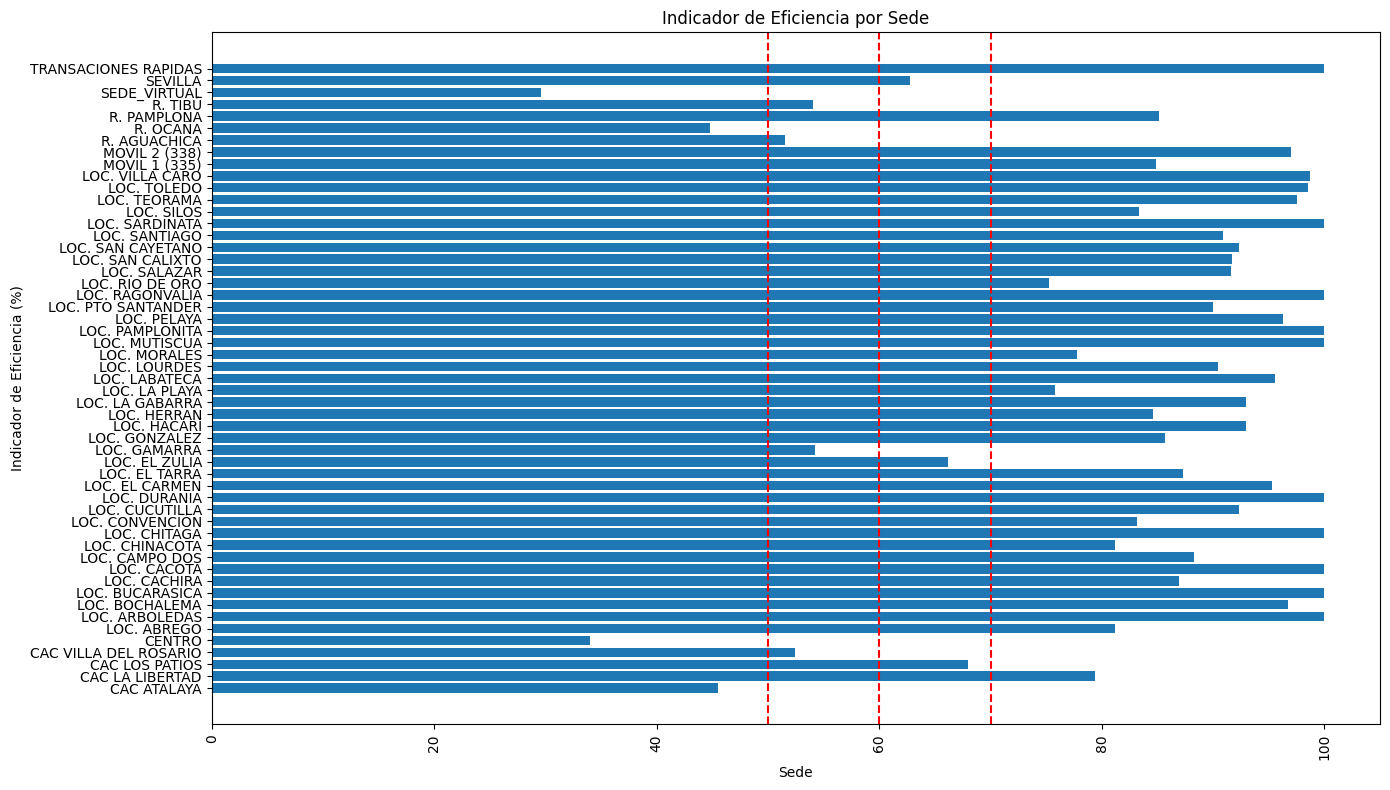

In [64]:
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Sede', 'Indicador'])
# Generar la gráfica de barras
plt.figure(figsize=(14, 8))
plt.barh(df_resultados['Sede'], df_resultados['Indicador'])
plt.xlabel('Sede')
plt.ylabel('Indicador de Eficiencia (%)')
plt.title('Indicador de Eficiencia por Sede')
plt.axvline(x=50, color='r', linestyle='--')
plt.axvline(x=60, color='r', linestyle='--')
plt.axvline(x=70, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

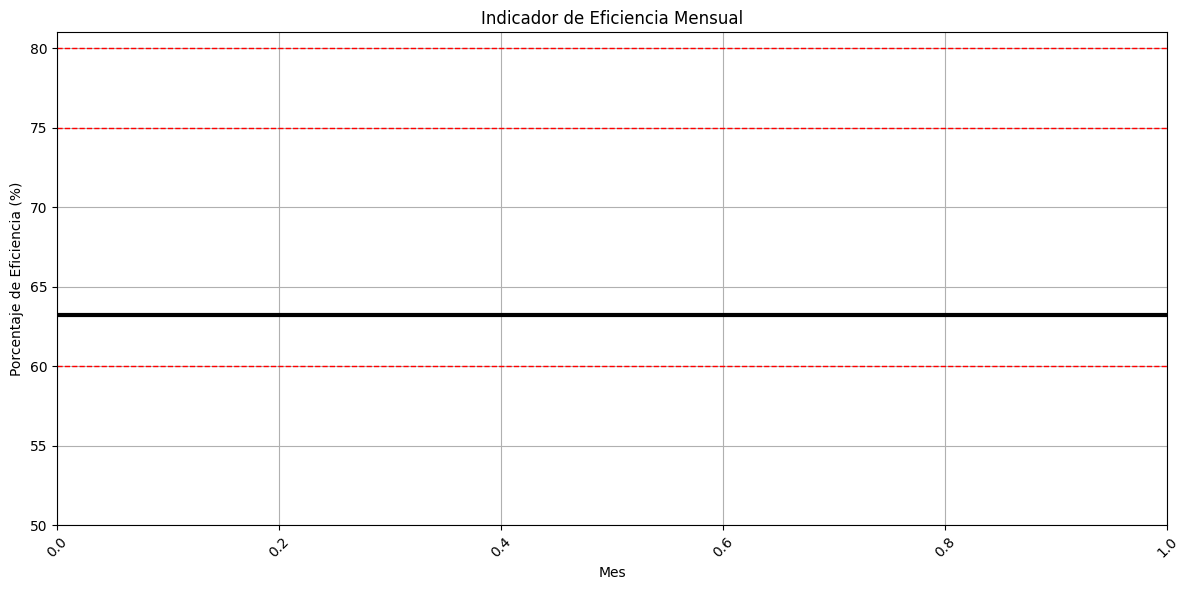

In [69]:
# Crear un gráfico de líneas para visualizar la eficiencia mes a mes
plt.figure(figsize=(12, 6))

plt.title('Indicador de Eficiencia Mensual')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Eficiencia (%)')
# Líneas horizontales en y = 60, 75 y 80
plt.axhline(y=60, color='red', linestyle='--', linewidth=1)
plt.axhline(y=75, color='red', linestyle='--', linewidth=1)
plt.axhline(y=80, color='red', linestyle='--', linewidth=1)
plt.axhline(y=indicador_total_p1, color='black', linewidth=3)
plt.ylim(50)
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

## Propuesta 2

In [66]:
# Definir los umbrales según la cantidad de turnos esperando
sedes_a_evaluar = list(data_procesada['Sede'].unique())

umbrales = {
    'grupo_1_P': {'baja': 15, 'alta': 20},
    'localidades': 15,
    'Sevilla_P': {'baja': 20, 'alta': 25},
    'grupo_1_NP': {'baja': 20, 'alta': 25},
    'Sevilla_NP': {'baja': 25, 'alta': 30},
    'Transacciones_Rapidas': 10,
    'Virtual_Tramites': {'baja': 20, 'alta': 25},
    'Virtual_Constructor': {'baja': 45, 'alta': 60},
    'Gramalote': 10
}

condicion_arribos = {
    'grupo_1': {'baja': 19, 'alta': 39},
    'grupo_2': {'baja': 9, 'alta': 19},
    'grupo_3': {'baja': 7, 'alta': 18},
    'grupo_4': {'baja': 5, 'alta': 10}
}

def determinar_umbral(grupo, sede, tipo, turnos_esperando):
    if grupo == 'Transacciones_Rapidas':
        return umbrales['Transacciones_Rapidas']
    elif grupo == 'Gramalote':
        return umbrales['Gramalote']
    if grupo in 'localidades':
        return umbrales['localidades']

    if grupo == 'Sevilla_NP' or grupo == 'Sevilla_P':
        if turnos_esperando < 20:
            return umbrales[grupo]['baja']
        elif turnos_esperando <= 39:
            return umbrales[grupo]['alta']
        else:
            return float('inf')  # Excepción, no cuenta para el umbral

    if grupo == 'Virtual_Constructor' or grupo == 'Virtual_Tramites':
        if turnos_esperando < 10:
            return umbrales[grupo]['baja']
        elif turnos_esperando <= 19:
            return umbrales[grupo]['alta']
        else:
            return float('inf')  # Excepción, no cuenta para el umbral

    grupo_arribos = None
    if sede in grupo_1_arribos:
        grupo_arribos = 'grupo_1'
    elif sede in grupo_2_arribos:
        grupo_arribos = 'grupo_2'
    elif sede in grupo_3_arribos:
        grupo_arribos = 'grupo_3'
    elif sede in grupo_4_arribos:
        grupo_arribos = 'grupo_4'

    if grupo_arribos:
        if turnos_esperando <= condicion_arribos[grupo_arribos]['baja']:
            return umbrales[grupo]['baja']
        elif turnos_esperando <= condicion_arribos[grupo_arribos]['alta']:
            return umbrales[grupo]['alta']
        else:
            return float('inf')  # Excepción, no cuenta para el umbral

    return float('inf')  # Si no encuentra la condición adecuada, lo considera una excepción

# Contadores de excepciones
excepciones_contador = 0

# Inicializar el contador total de turnos debajo del umbral y total de turnos
total_turnos_debajo_umbral = 0
total_turnos_mes = 0

# Crear un diccionario para almacenar los resultados
resultados = {}

for sede in sedes_a_evaluar:
    data_a_evaluar = data_procesada[data_procesada['Sede'] == sede]
    turnos_sede = len(data_a_evaluar)
    turnos_debajo_umbral = 0
    turnos_fuera_umbral = 0

    if turnos_sede == 0:  # Evitar la división por cero
        continue

    for turno in data_a_evaluar['IdTurno'].unique():  # Solo turnos únicos en el mes actual
        turno_a_evaluar = data_a_evaluar[data_a_evaluar['IdTurno'] == turno]
        grupo_turno = turno_a_evaluar['Clasificacion_P2'].iloc[0]  # Obtiene el grupo del turno
        sede_turno = turno_a_evaluar['Sede'].iloc[0]  # Obtiene la sede del turno
        tiempo_de_espera = turno_a_evaluar['Tiempo de espera'].iloc[0]  # Obtiene el tiempo de espera del turno
        turnos_esperando = turno_a_evaluar['Turnos_Esperando'].iloc[0]  # Obtiene los turnos esperando

        umbral = determinar_umbral(grupo_turno, sede_turno, grupo_turno, turnos_esperando)

        if umbral == float('inf'):
            excepciones_contador += 1
        elif tiempo_de_espera <= umbral:
            turnos_debajo_umbral += 1
        else:
            turnos_fuera_umbral += 1

    indicador = (turnos_debajo_umbral / turnos_sede) * 100
    total_turnos_debajo_umbral += turnos_debajo_umbral
    total_turnos_mes += turnos_sede
    resultados[sede] = indicador
    print(f'El indicador de eficiencia en la sede {sede} resultó en {indicador}%')

# Calcular el indicador total
indicador_total_p2 = (total_turnos_debajo_umbral / total_turnos_mes) * 100
print(f'El indicador total de eficiencia resultó en {indicador_total_p2}%')
print(f'Total de excepciones: {excepciones_contador}')

El indicador de eficiencia en la sede CAC ATALAYA resultó en 45.543175487465184%
El indicador de eficiencia en la sede CAC LA LIBERTAD resultó en 85.6095325389551%
El indicador de eficiencia en la sede CAC LOS PATIOS resultó en 76.63280116110305%
El indicador de eficiencia en la sede CAC VILLA DEL ROSARIO resultó en 57.74378585086042%
El indicador de eficiencia en la sede CENTRO resultó en 39.96224040276904%
El indicador de eficiencia en la sede LOC. ABREGO resultó en 81.20805369127517%
El indicador de eficiencia en la sede LOC. ARBOLEDAS resultó en 100.0%
El indicador de eficiencia en la sede LOC. BOCHALEMA resultó en 96.7741935483871%
El indicador de eficiencia en la sede LOC. BUCARASICA resultó en 100.0%
El indicador de eficiencia en la sede LOC. CACHIRA resultó en 86.93693693693693%
El indicador de eficiencia en la sede LOC. CACOTA resultó en 100.0%
El indicador de eficiencia en la sede LOC. CAMPO DOS resultó en 88.32116788321169%
El indicador de eficiencia en la sede LOC. CHINACOT

## Cantidad de turnos llamados en el umbral de espera

In [91]:
cantidad_turnos_umbral_espera_i_p2 = int((cantidad_turnos_generados * indicador_total_p2)/100) 
print(f'La cantidad de turnos que fueron llamados en el umbral de espera con las condiciones del indicador de eficiencia con la propuesta 2 es de: \n{cantidad_turnos_umbral_espera_i_p2} turnos')

La cantidad de turnos que fueron llamados en el umbral de espera con las condiciones del indicador de eficiencia con la propuesta 2 es de: 
18869 turnos


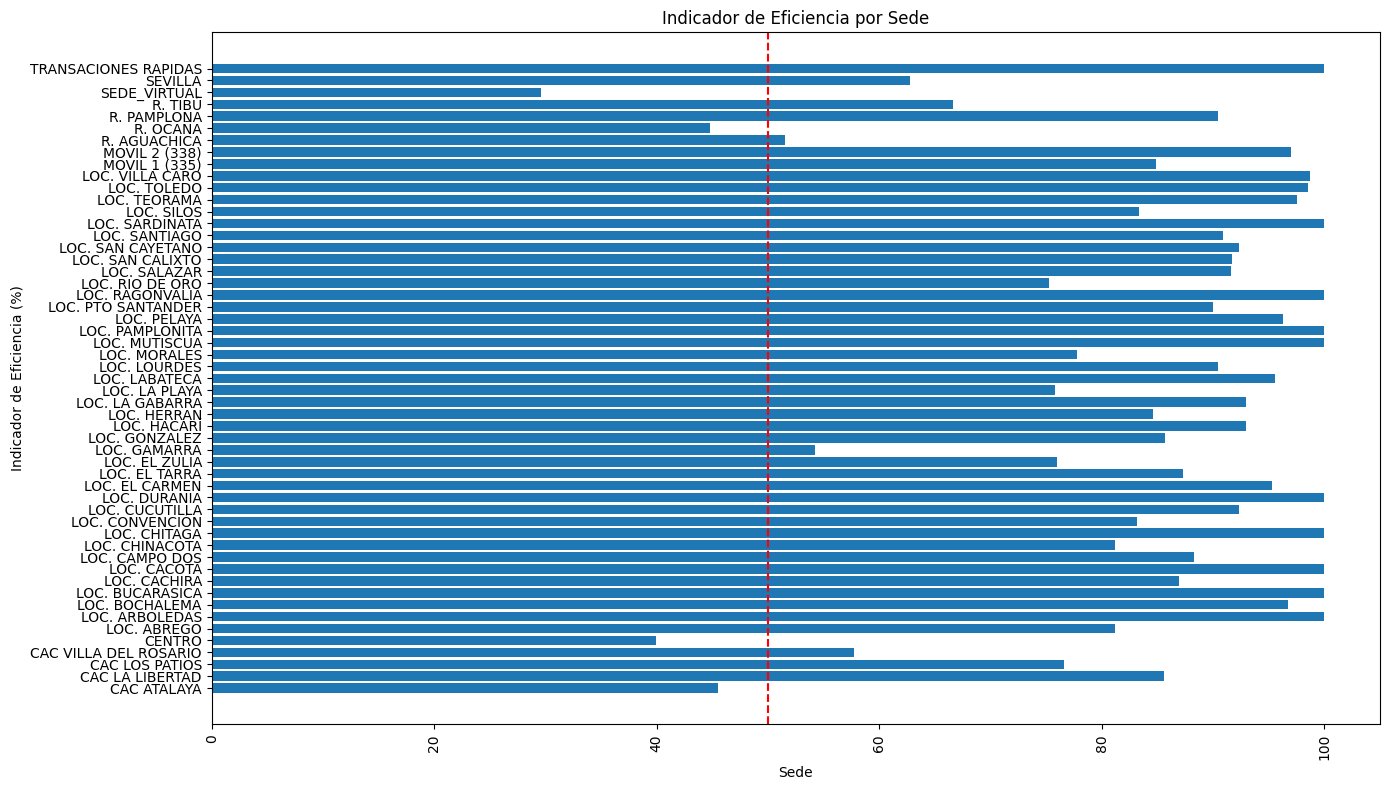

In [75]:
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Sede', 'Indicador'])
# Generar la gráfica de barras
plt.figure(figsize=(14, 8))
plt.barh(df_resultados['Sede'], df_resultados['Indicador'])
plt.xlabel('Sede')
plt.ylabel('Indicador de Eficiencia (%)')
plt.title('Indicador de Eficiencia por Sede')
plt.axvline(x=50, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

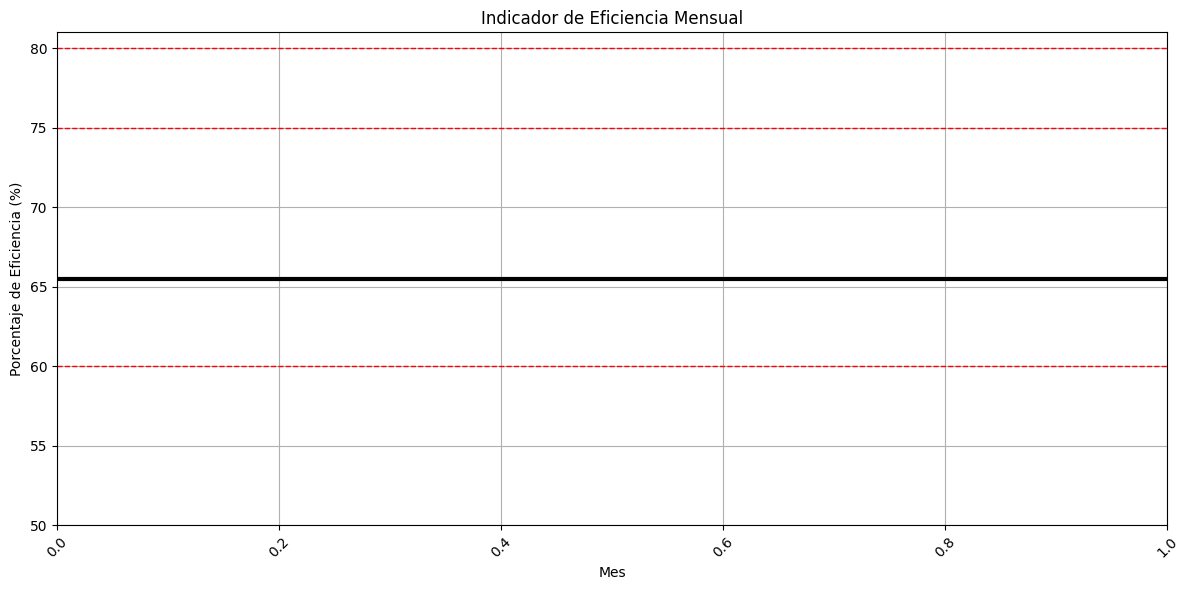

In [76]:
# Crear un gráfico de líneas para visualizar la eficiencia mes a mes
plt.figure(figsize=(12, 6))

plt.title('Indicador de Eficiencia Mensual')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Eficiencia (%)')
# Líneas horizontales en y = 60, 75 y 80
plt.axhline(y=60, color='red', linestyle='--', linewidth=1)
plt.axhline(y=75, color='red', linestyle='--', linewidth=1)
plt.axhline(y=80, color='red', linestyle='--', linewidth=1)
plt.axhline(y=indicador_total_p2, color='black', linewidth=3)
plt.ylim(50)
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

## Comportamiento historico

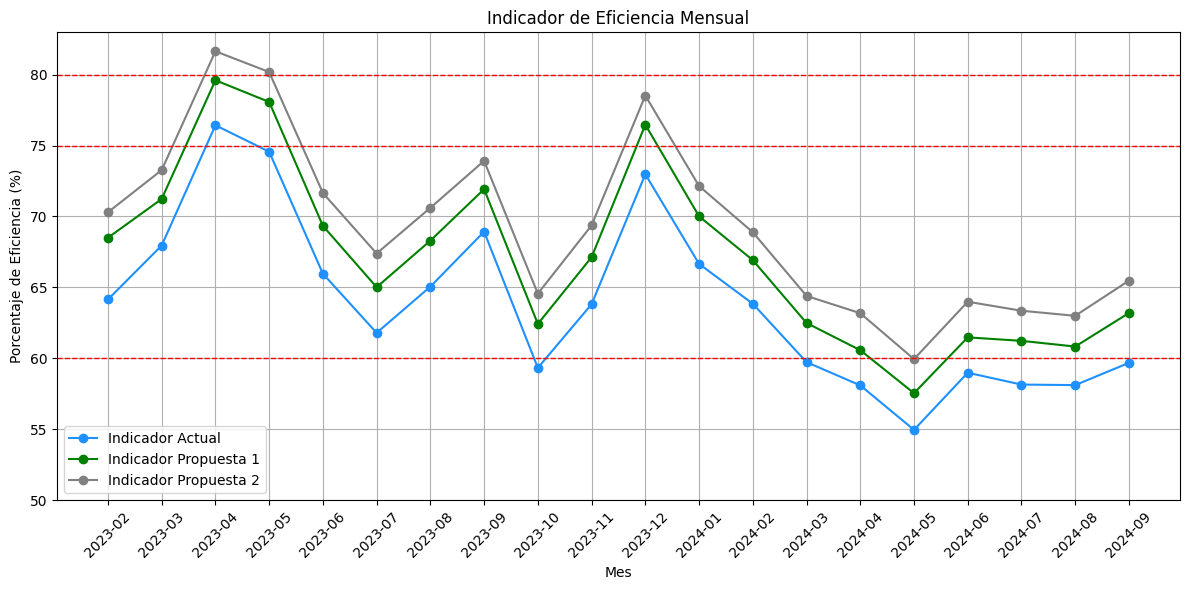

In [77]:
# Meses y porcentajes de los indicadores de eficiencia
meses = [
    "2023-02", "2023-03", "2023-04", "2023-05", "2023-06",
    "2023-07", "2023-08", "2023-09", "2023-10", "2023-11",
    "2023-12", "2024-01", "2024-02", "2024-03", "2024-04",
    "2024-05", "2024-06", "2024-07", "2024-08", "2024-09"
]

porcentajes_eficiencia = [64.14580681657475, 67.95118022427359, 76.43049672699269, 74.56394433599898, 65.96285373658782,
    61.790814357390964, 65.0503701905571, 68.92727797185988, 59.322911609541386, 63.81040707495611,
    72.97482754884611, 66.65449121845798, 63.8458251953125, 59.72718651980451, 58.08829857425629, 54.950993862782816, 58.980249622822654,
    58.1453634085213, 58.10704379687019, 59.67730742539903]

porcentajes_propuesta_1 = [
    68.49809079338142,
    71.23164611858002,
    79.6033885252214,
    78.0744285624331,
    69.33550856497459,
    65.01029203653673,
    68.29408908848161,
    71.92397679561553,
    62.42029970547303,
    67.12596469146435,
    76.47080067896998,
    70.0088271999513,
    66.9189453125,
    62.48814647311984,
    60.56928065191817,
    57.53840548910073,
    61.47304896447675,
    61.22837213515717,
    60.82594254014998,
    63.19222761970854

]

porcentajes_propuesta_2 = [
    70.29415924197426,
    73.26993370918778,
    81.64805544859453,
    80.18386751464014,
    71.65401267490745,
    67.38710922423775,
    70.60929724481126,
    73.92070766962597,
    64.5564294268052,
    69.3716670530953,
    78.52576835566471,
    72.14561836057591,
    68.8873291015625,
    64.39565249106425,
    63.177527187168224,
    59.93988706053798,
    63.98642161569058,
    63.351148956729176,
    62.99352806218539,
    65.47536433032616

]

# Crear un gráfico de líneas para visualizar la eficiencia mes a mes
plt.figure(figsize=(12, 6))
plt.plot(meses, porcentajes_eficiencia, marker='o', linestyle='-', color='dodgerblue', label='Indicador Actual')
plt.plot(meses, porcentajes_propuesta_1, marker='o', linestyle='-', color='green', label='Indicador Propuesta 1')
plt.plot(meses, porcentajes_propuesta_2, marker='o', linestyle='-', color='gray', label='Indicador Propuesta 2')



plt.title('Indicador de Eficiencia Mensual')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Eficiencia (%)')
# Líneas horizontales en y = 60, 75 y 80
plt.axhline(y=60, color='red', linestyle='--', linewidth=1)
plt.axhline(y=75, color='red', linestyle='--', linewidth=1)
plt.axhline(y=80, color='red', linestyle='--', linewidth=1)
plt.ylim(50)
plt.legend()
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

# Indicador Eficacia

In [78]:
#Turnos abandonados
print(data_procesada['Abandonado'].value_counts())
total_turnos = len(data_procesada)
atendidos = len(data_procesada[data_procesada['Abandonado']=='NO'])
print(total_turnos)
print(f'El indicador de eficacia para el mes evaluado corresponde a: {np.around((atendidos/total_turnos)*100,2)}%')

NO    27911
SI      909
Name: Abandonado, dtype: int64
28820
El indicador de eficacia para el mes evaluado corresponde a: 96.85%


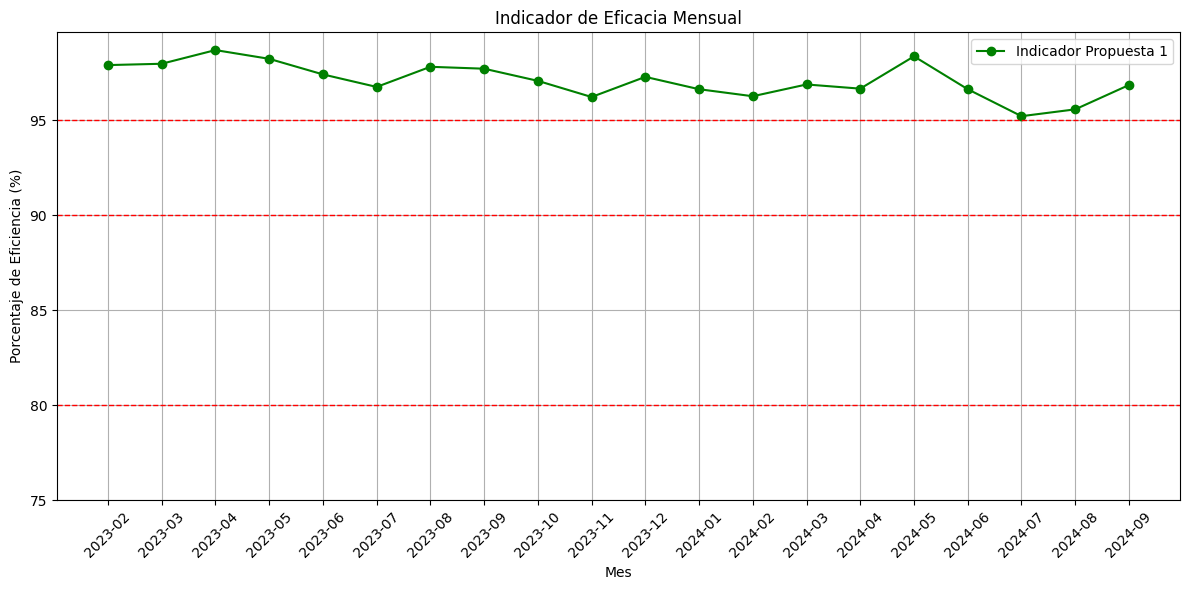

In [79]:
# Meses y porcentajes de los indicadores de eficiencia
meses = [
    "2023-02", "2023-03", "2023-04", "2023-05", "2023-06",
    "2023-07", "2023-08", "2023-09", "2023-10", "2023-11",
    "2023-12", "2024-01", "2024-02", "2024-03", "2024-04",
    "2024-05", "2024-06", "2024-07", "2024-08", "2024-09"
]

porcentajes_eficacia = [97.9, 97.97, 98.69, 98.23, 97.41, 96.75, 97.81, 97.71, 97.07, 96.22, 97.28, 96.63, 96.26, 96.88, 96.66,
                        98.36, 96.63, 95.21,95.57, 96.85]


# Crear un gráfico de líneas para visualizar la eficiencia mes a mes
plt.figure(figsize=(12, 6))
plt.plot(meses, porcentajes_eficacia, marker='o', linestyle='-', color='green', label='Indicador Propuesta 1')
plt.title('Indicador de Eficacia Mensual')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Eficiencia (%)')
# Líneas horizontales en y = 60, 75 y 80
plt.axhline(y=90, color='red', linestyle='--', linewidth=1)
plt.axhline(y=95, color='red', linestyle='--', linewidth=1)
plt.axhline(y=80, color='red', linestyle='--', linewidth=1)
plt.ylim(75)
plt.legend()
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

# Informe resumido

In [94]:
print(f'La cantidad total de turnos generados durante el mes evaluado es de: {cantidad_turnos_generados} turnos')
print(f'La cantidad de turnos llamados en el umbral de espera con las condiciones del indicador de eficiencia actual es de: {cantidad_turnos_umbral_espera_i_actual} turnos')
print(f'La cantidad de turnos llamados en el umbral de espera con las condiciones del indicador de eficiencia de la propuesta 1 es de: {cantidad_turnos_umbral_espera_i_p1} turnos')
print(f'La cantidad de turnos llamados en el umbral de espera con las condiciones del indicador de eficiencia de la propuesta 2 es de: {cantidad_turnos_umbral_espera_i_p2} turnos')
print(f'La cantidad de turnos atendidos es de: {atendidos} turnos')

La cantidad total de turnos generados durante el mes evaluado es de: 28820 turnos
La cantidad de turnos llamados en el umbral de espera con las condiciones del indicador de eficiencia actual es de: 17199 turnos
La cantidad de turnos llamados en el umbral de espera con las condiciones del indicador de eficiencia de la propuesta 1 es de: 18212 turnos
La cantidad de turnos llamados en el umbral de espera con las condiciones del indicador de eficiencia de la propuesta 2 es de: 18869 turnos
La cantidad de turnos atendidos es de: 27911 turnos
